# 1. Pre-Processing by Juan Palacio
* Handle missing values, one-hot encoding, and scaling.
* Prepare and clean the dataset for analysis.

### Exploring Raw data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

rawdataset = pd.read_csv('AB_NYC_2019.csv')

rawdataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [41]:
rawdataset.shape

(48895, 16)

In [42]:
rawdataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [43]:
rawdataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [44]:
rawdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [45]:
rawdataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [46]:
# prompt: count all the number of row duplicates from rawdataset

duplicate_rows = rawdataset[rawdataset.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [47]:
# prompt: check for nan or blank values from rawdata

import pandas as pd

# # 1. Pre-Processing
# * Handle missing values, one-hot encoding, and scaling.
# * Prepare and clean the dataset for analysis.
# ### Exploring Raw data

rawdataset = pd.read_csv('AB_NYC_2019.csv')

# Check for NaN values
nan_values = rawdataset.isna().sum()
print("NaN values per column:\n", nan_values)

# Check for blank strings (empty strings)
blank_strings = (rawdataset == '').sum()
print("\nBlank string values per column:\n", blank_strings)

#Combined check
def check_missing_or_blank(df):
    missing_values = df.isna().sum()
    blank_values = (df == '').sum()
    combined_missing = missing_values + blank_values
    return combined_missing

combined_missing = check_missing_or_blank(rawdataset)
print("\nCombined missing (NaN or blank) values per column:\n", combined_missing)

NaN values per column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Blank string values per column:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
r

# 2. Exploratory Data Analysis
* Create visualizations for feature distributions and
* Analyze target variable and address class imbalance.

In [48]:
dataStep2 = rawdataset.copy()

# 1. Lets checkout Basic Overview and Data Summary
print("Dataset Shape:", dataStep2.shape)
print("\nDataset Info:")
print(dataStep2.info())
print("\nSummary Statistics:")
print(dataStep2.describe())


Dataset Shape: (48895, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int


Missing Values per Column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


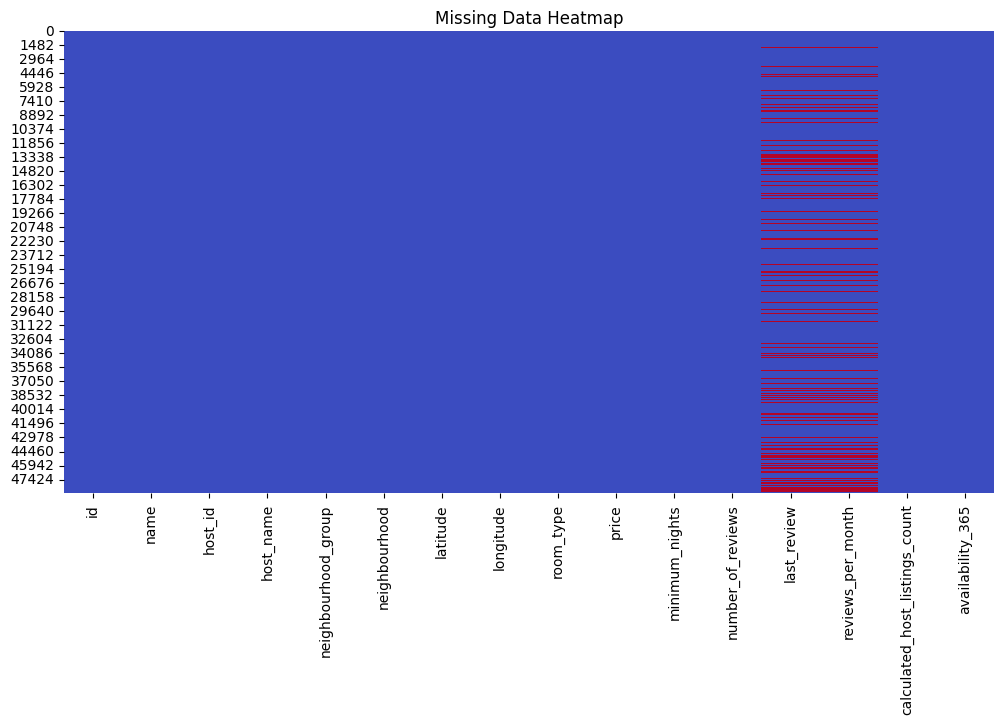

In [49]:
# 2. Analysing Missing Values
print("\nMissing Values per Column:")
print(dataStep2.isnull().sum())

# Visualizing missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataStep2.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Data Heatmap")
plt.show()


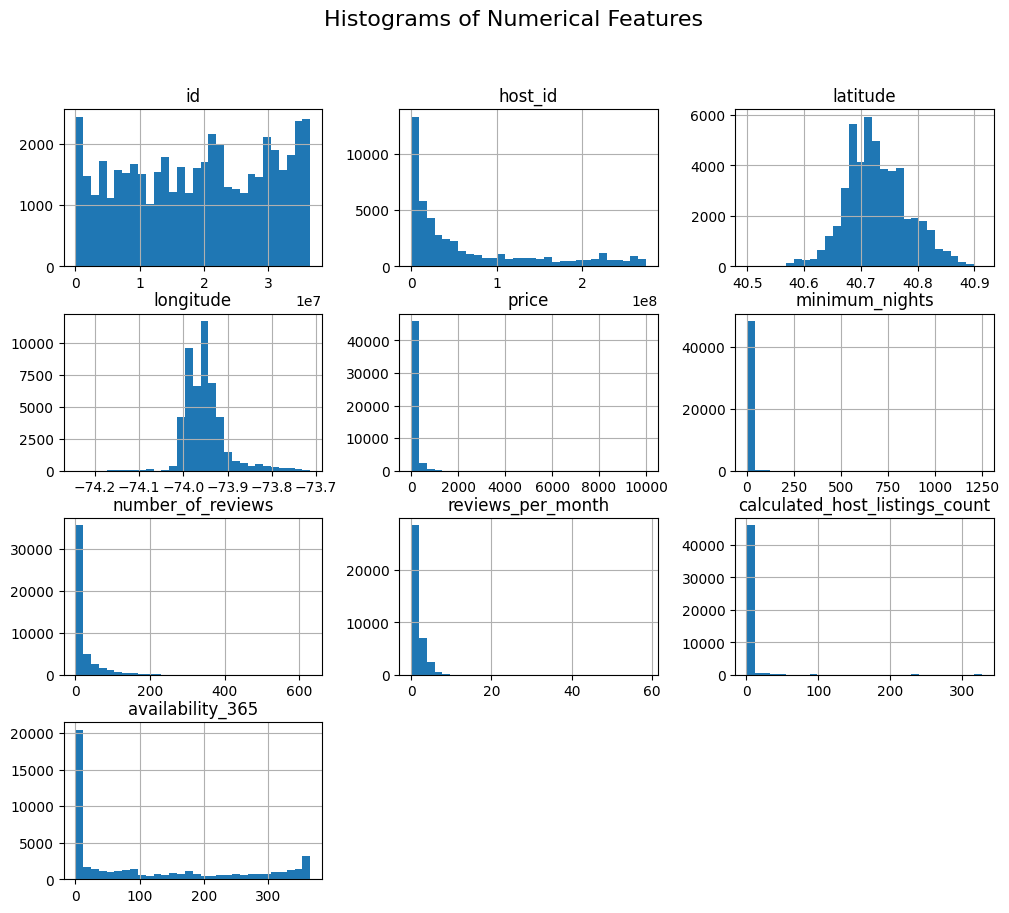

In [50]:
# 3. Distribution of Numerical Variables
numerical_cols = dataStep2.select_dtypes(include=['int64', 'float64']).columns
dataStep2[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", size=16)
plt.show()

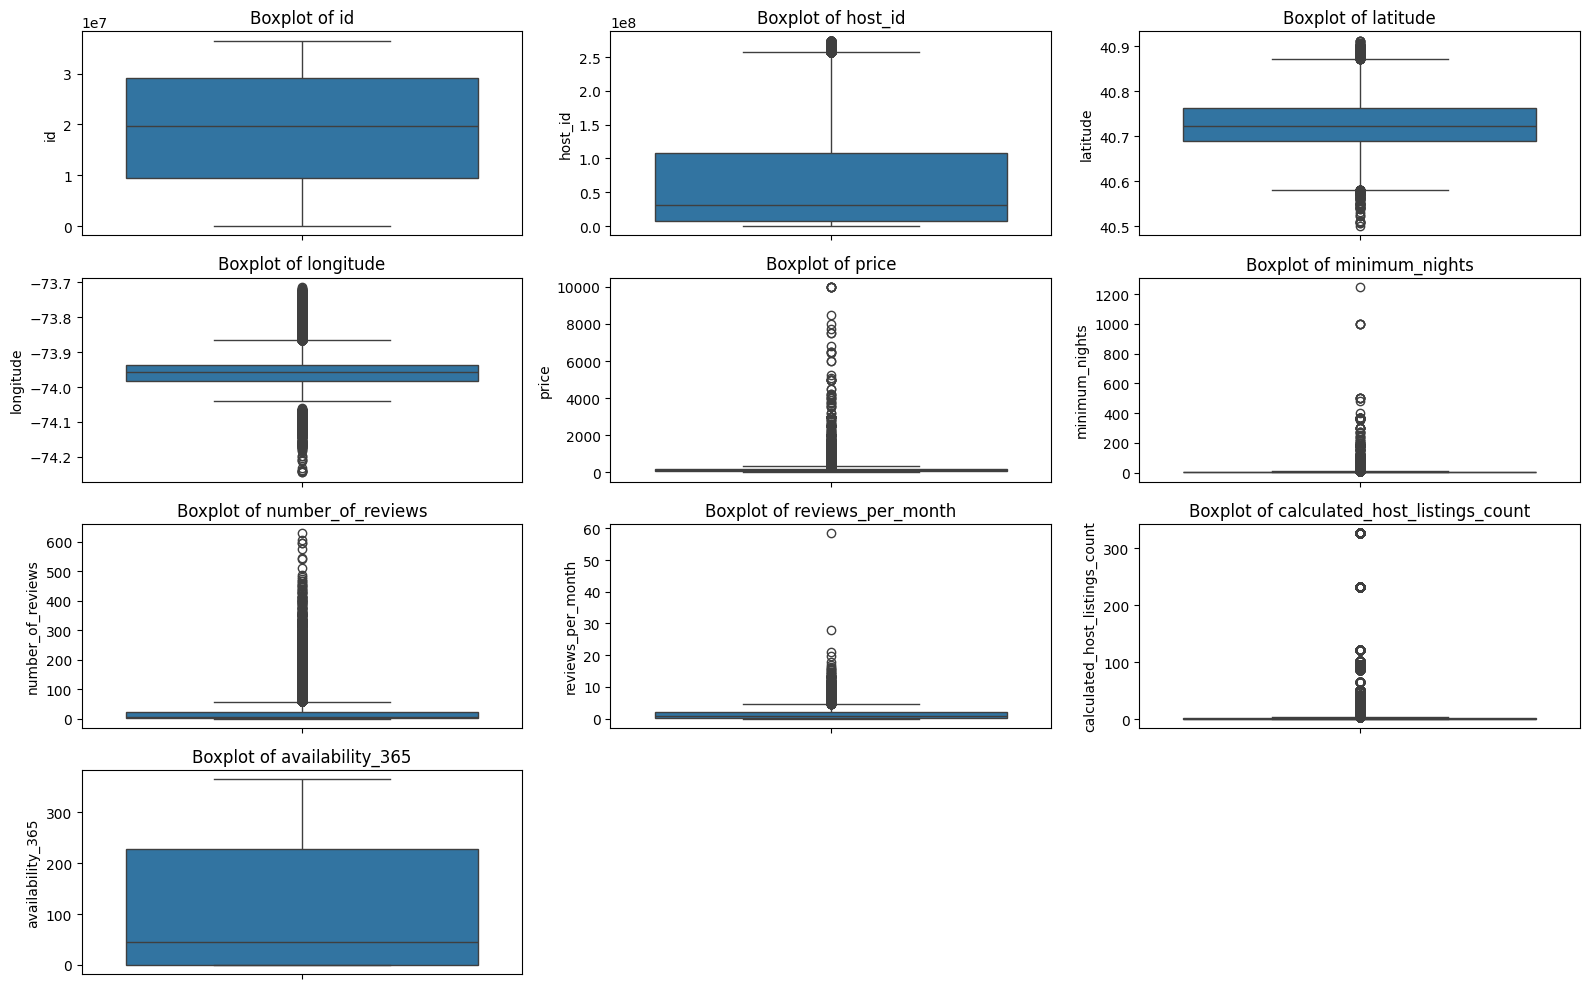

In [51]:
# 4. Boxplots for Outlier Detection
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i) 
    sns.boxplot(data=dataStep2[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


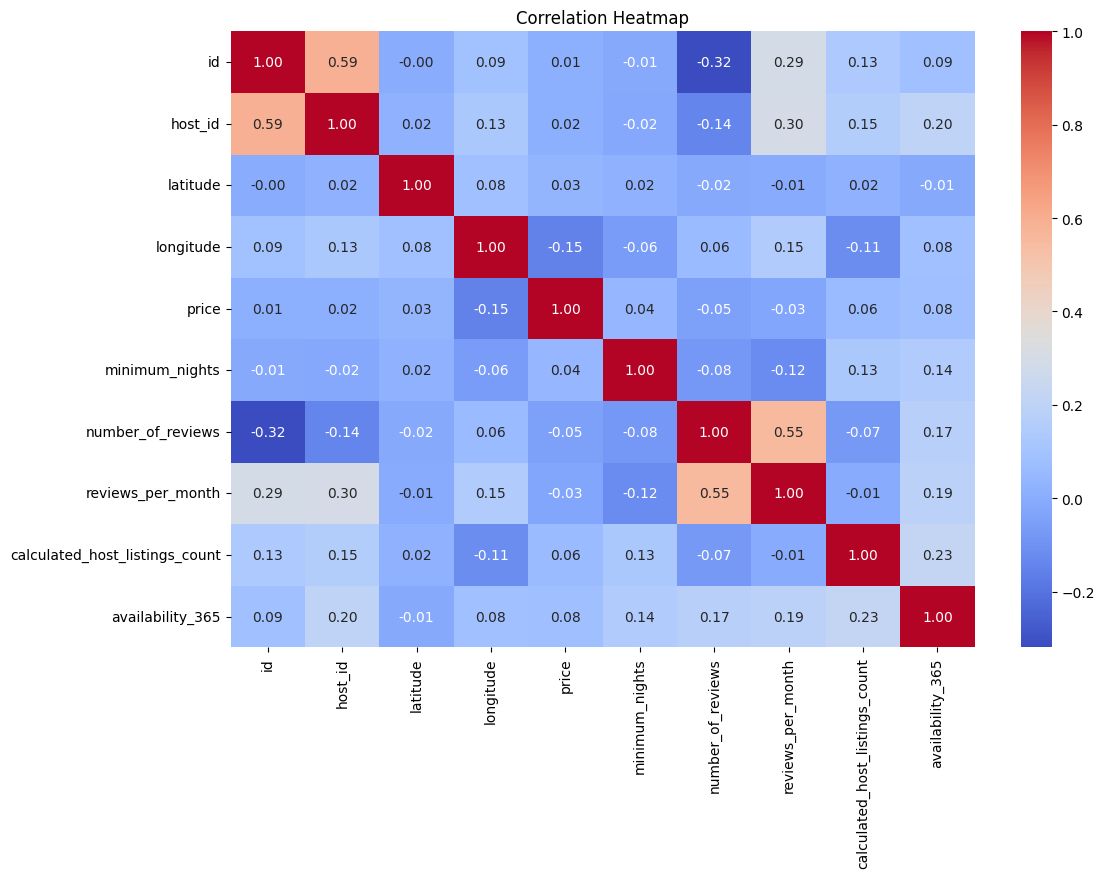

In [52]:
# 5. Correlation Heatmap
corr = dataStep2[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


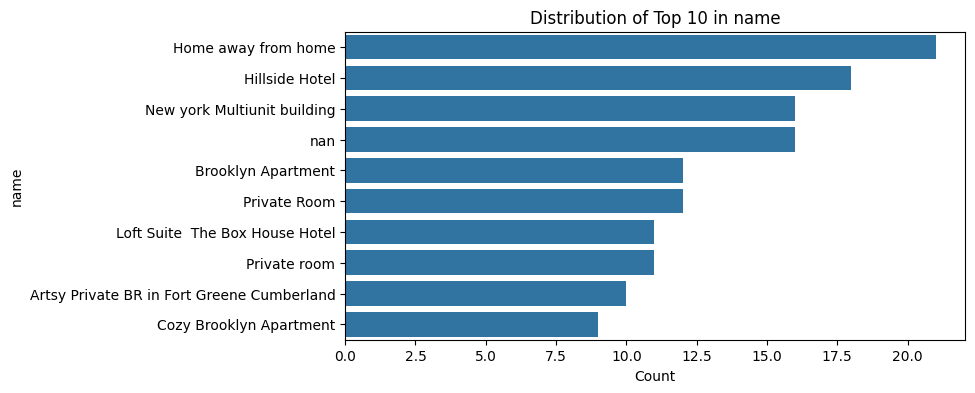

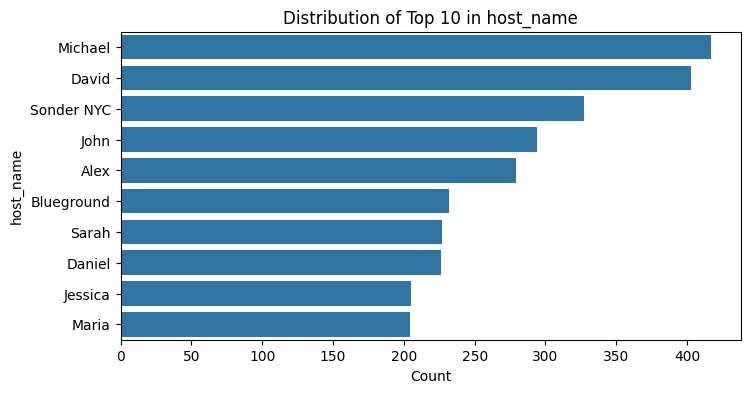

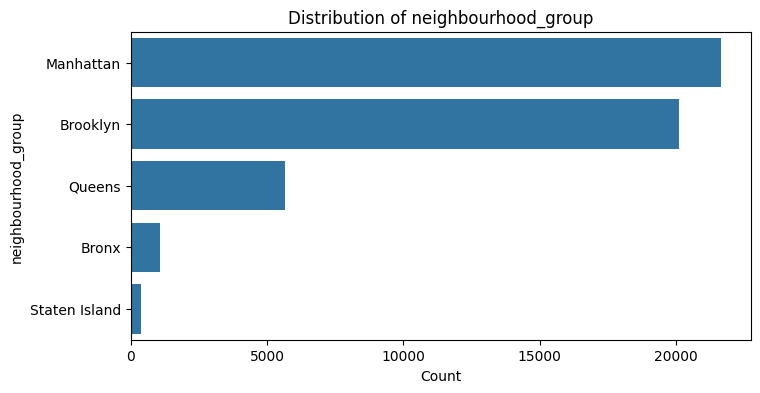

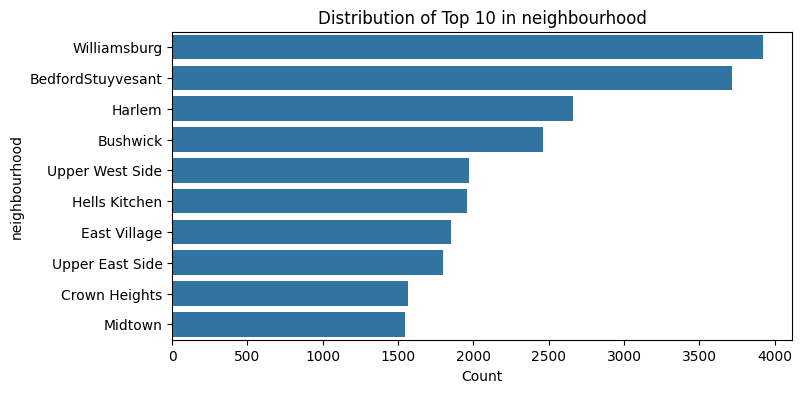

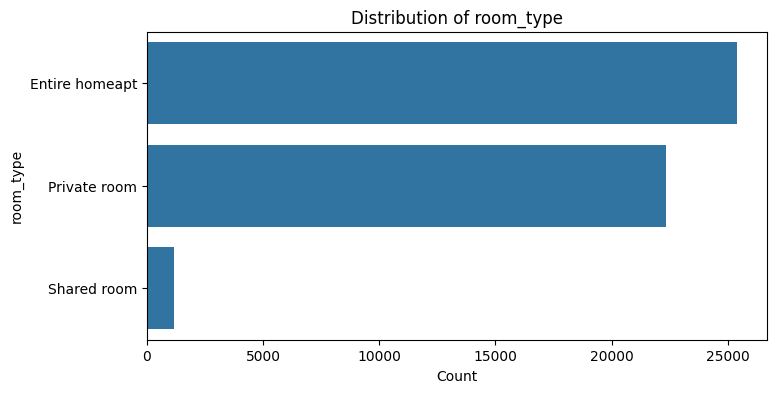

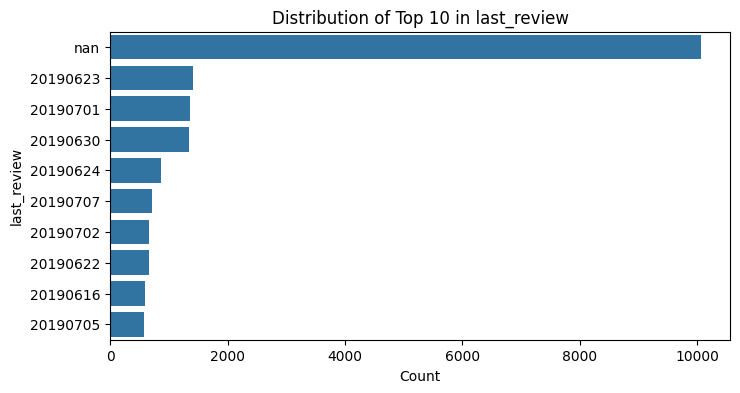

In [53]:
# 6. Analyzing Categorical Variables with Optimizations
categorical_cols = dataStep2.select_dtypes(include=['object']).columns
def clean_text(text):
    try:
        # Removing special characters, non-printable characters, Keeping only alphanumeric and space
        text = re.sub(r'[^\w\s]', '', text)  # 
        text = ''.join(char for char in text if char.isprintable())
        return text
    except Exception:
        return text  # Return if cleaning fails

for col in categorical_cols:
    dataStep2[col] = dataStep2[col].astype(str).apply(clean_text)

MAX_CATEGORIES = 30  # Plotting only if the number of unique categories is below this threshold
TOP_N_CATEGORIES = 10  # If above threshold, plot only the top N categories

for col in categorical_cols:
    unique_count = dataStep2[col].nunique()
    
    if unique_count <= MAX_CATEGORIES:
        try:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataStep2, y=col, order=dataStep2[col].value_counts().index)
            plt.title(f"Distribution of {col}")
            plt.xlabel("Count")
            plt.show()
        except Exception:
            pass  
    elif unique_count > MAX_CATEGORIES:
        try:
            top_categories = dataStep2[col].value_counts().nlargest(TOP_N_CATEGORIES).index
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataStep2[dataStep2[col].isin(top_categories)], y=col, order=top_categories)
            plt.title(f"Distribution of Top {TOP_N_CATEGORIES} in {col}")
            plt.xlabel("Count")
            plt.show()
        except Exception:
            pass  


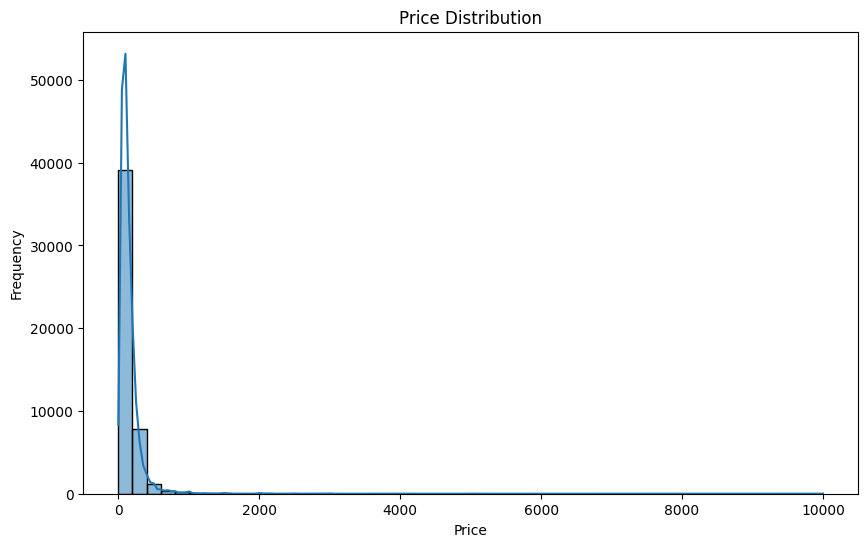

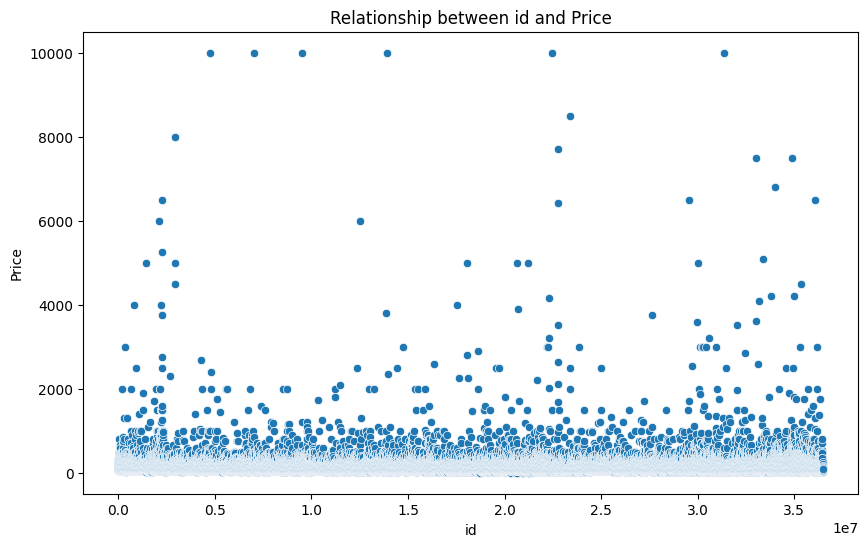

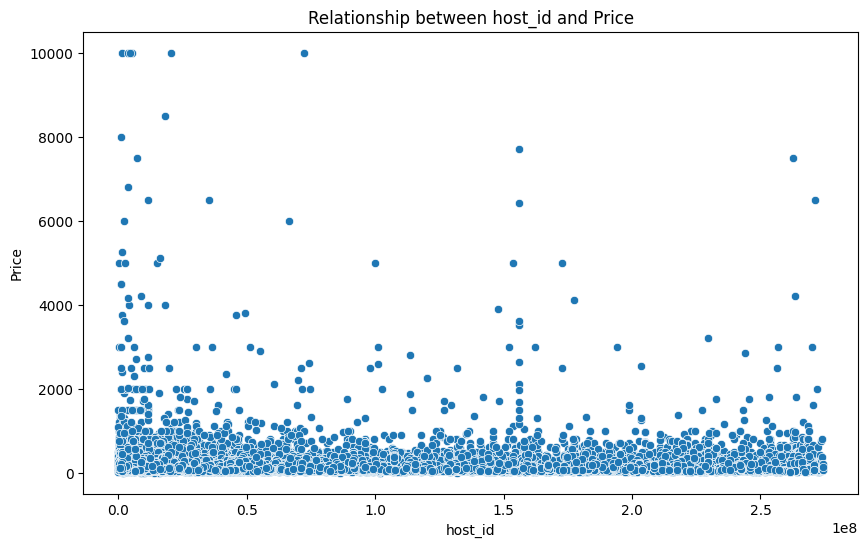

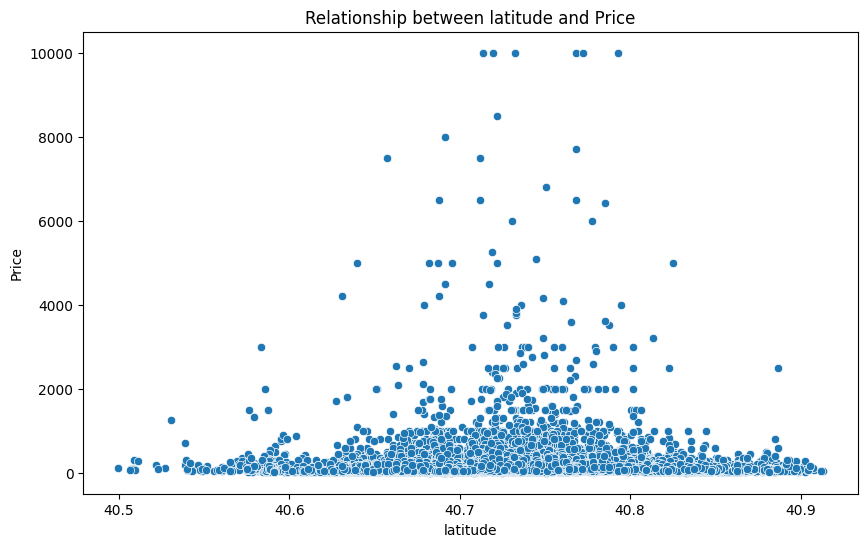

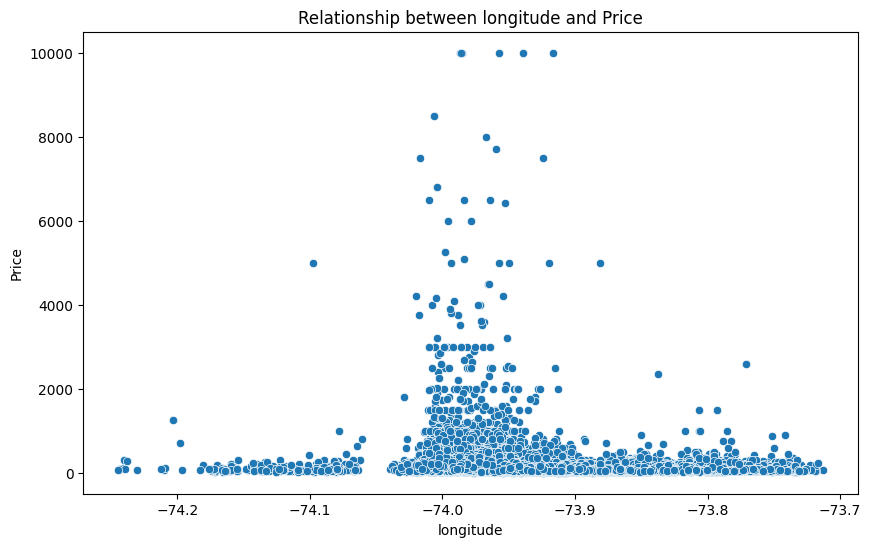

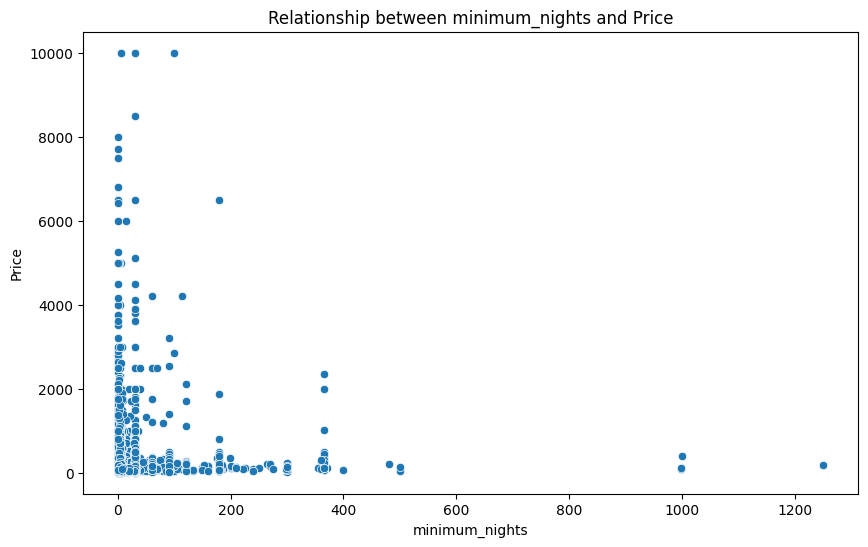

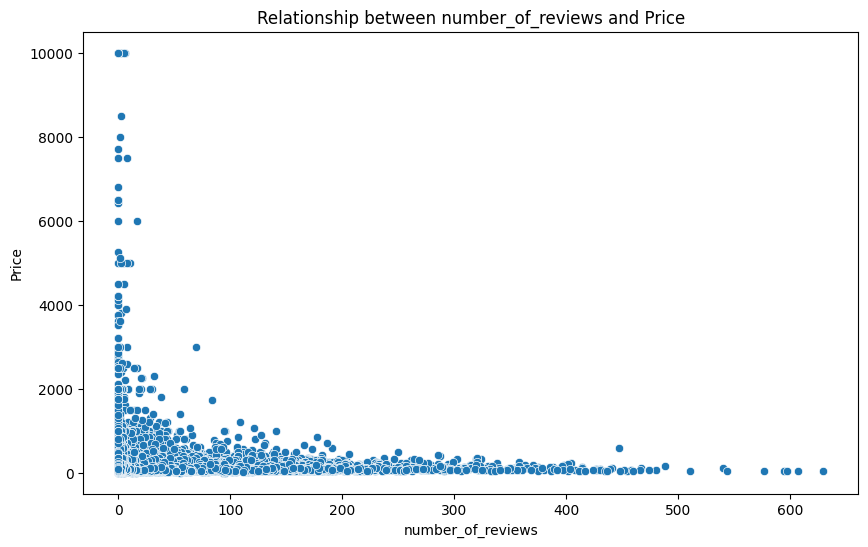

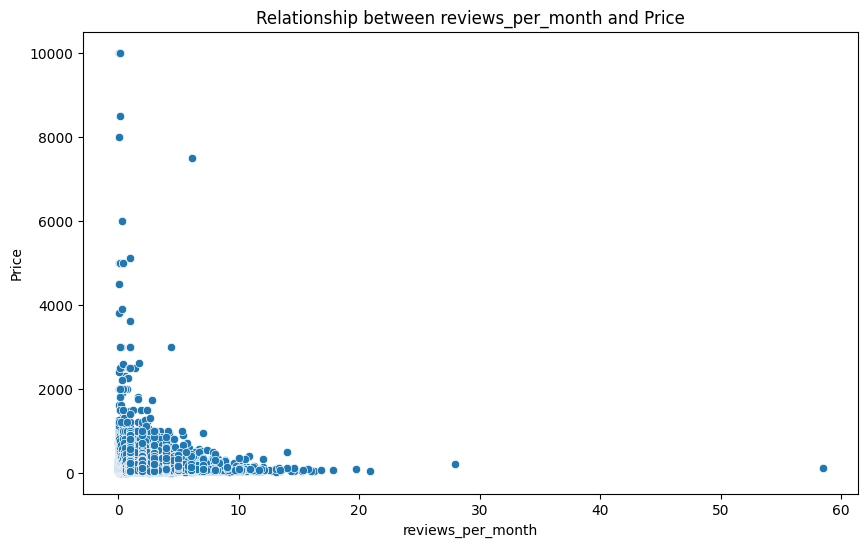

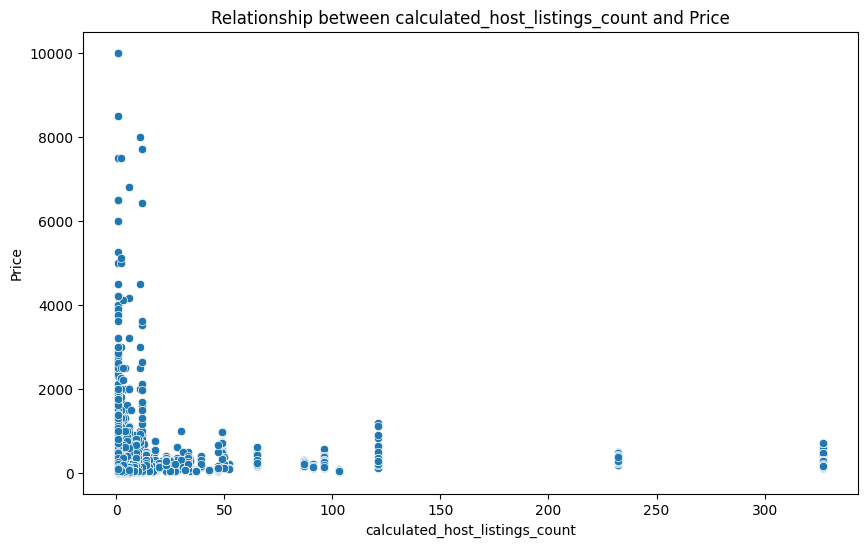

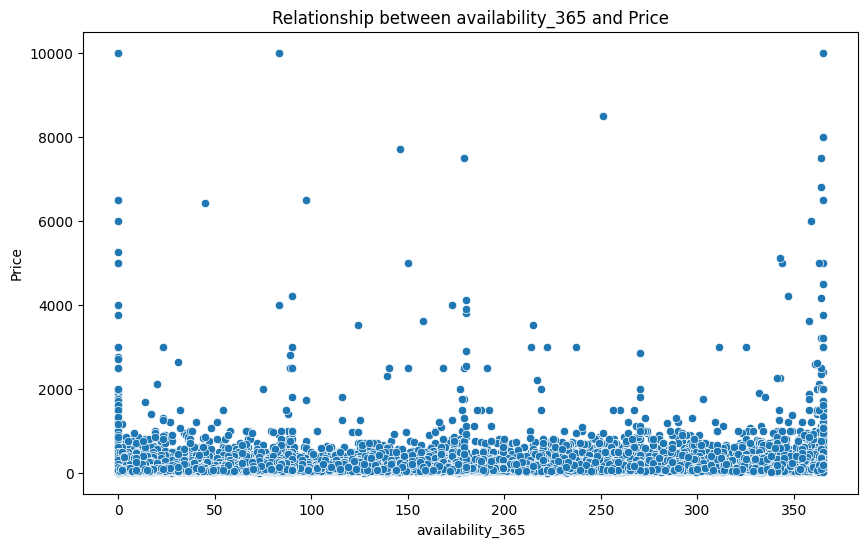

EDA completed successfully!


In [54]:
# 7. Target Variable Analysis
# Assuming 'price' as the target variable
plt.figure(figsize=(10, 6))
sns.histplot(dataStep2['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Analyzing relationships with 'price' (target variable)
for col in numerical_cols:
    if col != 'price':  # Excluding the target column itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=dataStep2[col], y=dataStep2['price'])
        plt.title(f"Relationship between {col} and Price")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()

print("EDA completed successfully!")

# 3. Machine Learning Models

* Build and tune multiple models (e.g., Logistic Regression, Random Forest).
* Compare models using metrics like F1-score, AUC-ROC, or R².

In [55]:
dataStep3 = dataStep2.copy()
#Guys use any other alias if you want

# 4. Model Interpretation & Presentation

* Interpret models (e.g., feature importance, SHAP values).
* Create final report, slides, and assist with video editing.

In [56]:
dataStep4 = dataStep3.copy()